<a href="https://colab.research.google.com/github/JSEFERINO/JHSERIES2/blob/main/07_Series_Tiempo_Cap5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Introductorio Series de Tiempo por Julio Hurtado Márquez**
## **Text: Time Series Forecasting in Python - MARCO PEIXEIRO**
# **Parte 2. Pronósticos con modelos estadísticos**

# **5. Modelado de un proceso autorregresivo**
## **Este capítulo cubre**
+ Ilustrando un proceso autorregresivo
+ Definición de la *función de autocorrelación parcial (PACF)*
+ Uso del *gráfico PACF* para determinar el orden de un proceso autorregresivo
+ Pronosticar una serie de tiempo usando el modelo autorregresivo.

## **Introducción**
+ En el capítulo anterior, cubrimos el *proceso de media móvil*, también denominado $MA( q )$, donde $q$ es el orden.
+ *Aprendiste que en un proceso de media móvil, el valor presente depende linealmente de los términos de error actuales y pasados.*
+ Por lo tanto, si predice más de $q$ pasos adelante, la predicción fracasará y devolverá solo la media de la serie, porque los términos de error no se observan en los datos y deben estimarse de forma recursiva.
+ Finalmente, viste que puedes determinar el orden de un proceso $MA(q)$ estacionario estudiando el *gráfico ACF*; los coeficientes de autocorrelación serán significativos hasta el rezago $q$.
+ **En el caso de que los coeficientes de autocorrelación decaigan lentamente o muestren un patrón sinusoidal, es posible que se encuentre en presencia de un proceso autorregresivo.**

+ En este capítulo, primero definiremos el proceso autorregresivo.
+ Luego, definiremos la función de autocorrelación parcial y la usaremos para encontrar el orden del proceso autorregresivo subyacente de un conjunto de datos.
+ Finalmente, usaremos el modelo *AR( p )* para producir pronósticos.

# **5.1. Predicción del tráfico peatonal semanal promedio en una tienda minorista**
+ *Suponga que desea pronosticar el tráfico peatonal semanal promedio en una tienda minorista para que el director de la tienda pueda administrar mejor el horario del personal*.
+ *Si se espera que venga mucha gente a la tienda, entonces deberían estar presentes más empleados para brindar asistencia.*
+ *Por supuesto, si se espera que visiten la tienda menos personas, entonces el director puede programar que trabajen menos empleados durante esa semana para que la tienda pueda optimizar su gasto en salarios y garantizar que los empleados no se sientan abrumados o decepcionados por los visitantes de la tienda.*

+ **En esta situación, recopilamos 1000 puntos de datos, cada uno de los cuales representa el tráfico peatonal promedio semanal en una tienda minorista a partir del año 2000. Podemos ver la evolución de nuestros datos a través del tiempo en la figura 5.1.**

+ **Figura 5.1 Tráfico peatonal promedio semanal en una tienda minorista. El conjunto de datos contiene 1.000 puntos de datos, a partir de la primera semana de 2000. Tenga en cuenta que se trata de datos ficticios.**

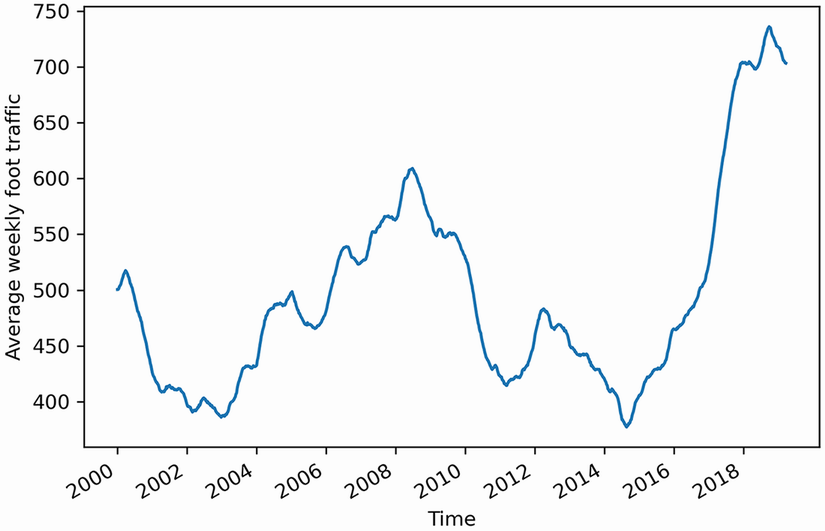

##**Acerca de la figura 5.1**
+ Si observamos la figura 5.1, podemos ver una tendencia a largo plazo con *picos* y *valles* a lo largo del camino.
+ A partir de esta observación, podemos decir intuitivamente que esta serie de tiempo *no es un proceso estacionario ya que observamos una tendencia a lo largo del tiempo.*
+ Además, *no hay ningún patrón cíclico aparente* en los datos, por lo que podemos descartar *cualquier efecto estacional* por ahora.

##**Acerca del Pronóstico**
+ Nuevamente, para pronosticar el tráfico peatonal promedio semanal, necesitamos identificar el proceso subyacente.
+ Por lo tanto, debemos aplicar los mismos pasos que cubrimos en el capítulo 4.
+ De esa manera, podemos verificar si estamos en juego un proceso de caminata aleatoria o de media móvil.
+ Los pasos se muestran en la figura 5.2.

+ **Figura 5.2 Pasos para identificar el proceso subyacente de una serie de tiempo estacionaria. Hasta ahora podemos identificar un paseo aleatorio o un proceso de media móvil.**

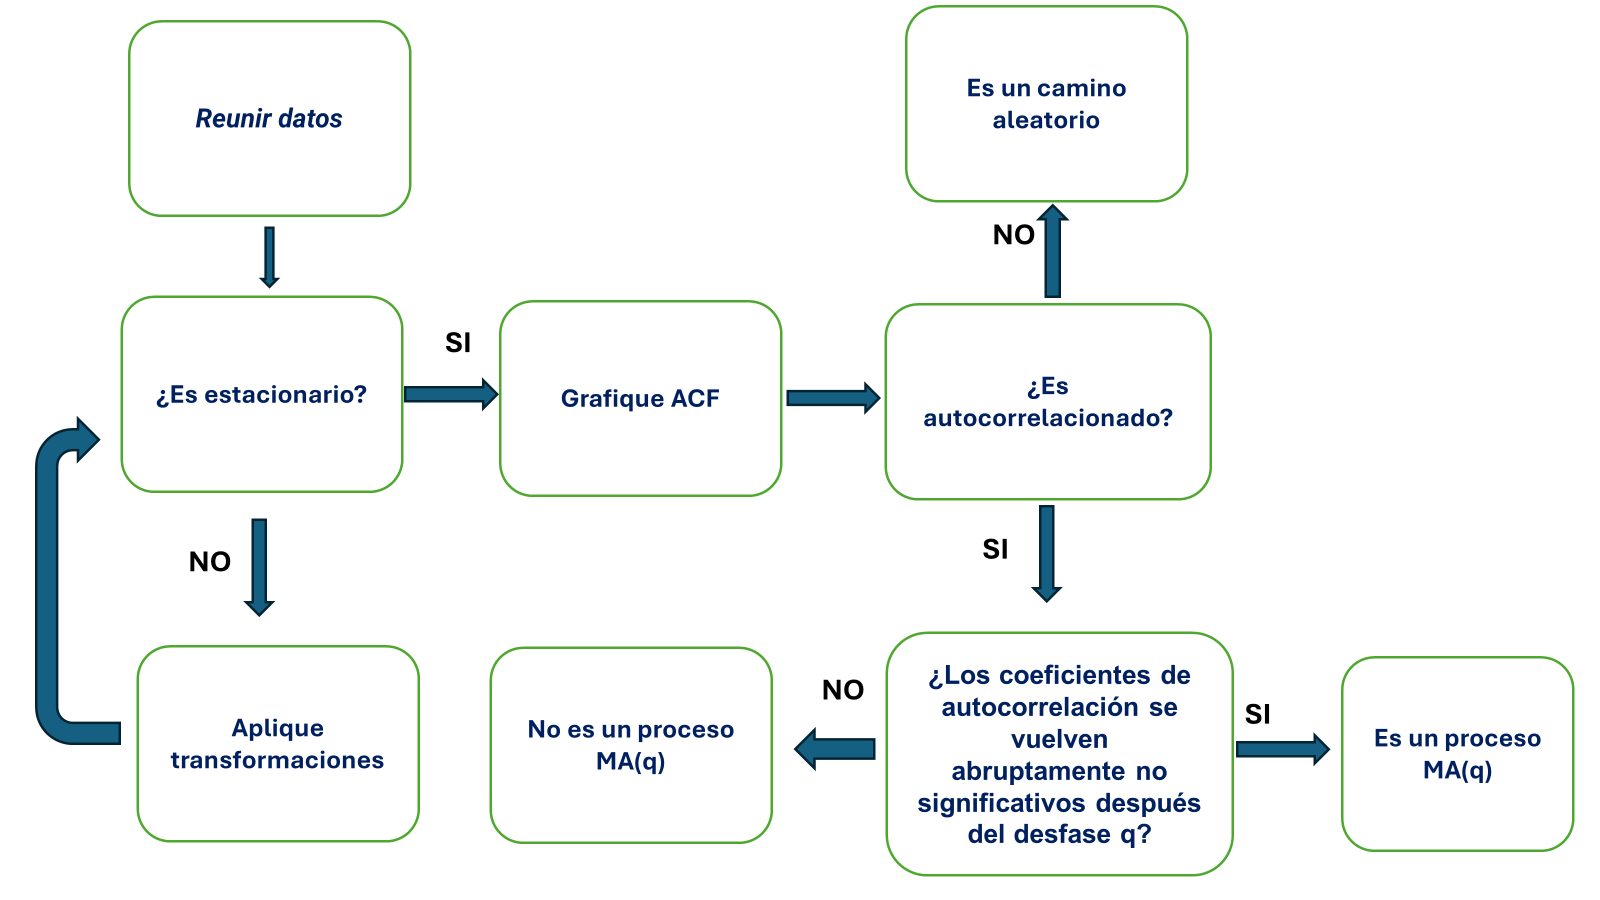

##**Acerca del Pronóstico**
+ Aquí los datos ya están recopilados, por lo que podemos pasar a probar la estacionariedad.
+ Como se mencionó anteriormente, la presencia de una tendencia a lo largo del tiempo significa que nuestra serie probablemente no sea estacionaria, por lo que tendremos que aplicar una transformación para volverla estacionaria.
+ Luego, trazaremos el *ACF*.
+ **A medida que avanzamos en el capítulo, notaremos que no sólo hay autocorrelación, sino que el gráfico ACF tendrá una tendencia decreciente lentamente.**

+ *Esto es indicativo de un proceso autorregresivo de orden $p$ , también denominado $AR(p)$.
+ En este caso, debemos *trazar la función de autocorrelación parcial o PACF* para encontrar el orden $p$.
+ **Al igual que los coeficientes en un gráfico _ACF_ para un proceso $MA(q)$, los coeficientes en el gráfico _PACF_ dejarán de ser significativos abruptamente después del retraso $p$ , determinando así el orden del proceso autorregresivo.**

+ Nuevamente, el orden del proceso autorregresivo determina cuántos parámetros deben incluirse en el modelo $AR(p)$.
+ Entonces, estamos listos para hacer pronósticos. En esta situación, deseamos pronosticar el tráfico peatonal promedio de la próxima semana.

# **5.2. Definición del proceso autorregresivo**
+ *Un proceso autorregresivo establece que la variable de salida depende linealmente de sus propios valores previos.*
+ *En otras palabras, se trata de una regresión de la variable contra sí misma.*

+ *Un proceso autorregresivo se denota como un proceso $AR(p)$, donde $p$ es el orden*.
+ En tal proceso, el valor actual $y_t$ es una combinación lineal de una constante $C$ , el término de error presente $ϵ_t$, que también es ruido blanco, y los valores pasados ​​de la serie $y_{t-p}$.
+ La magnitud de la influencia de los valores pasados ​​sobre el valor presente se denota como $ϕ_p$, que representa los coeficientes del modelo $AR(p)$.
+ Matemáticamente, expresamos un modelo $AR(p)$ general como la ecuación 5.1.

+ **Ecuación 5.1**

$$y_t = C + ϕ_1* y_{t –1} + ϕ_2* y_{t –2} +⋅⋅⋅ ϕ_p*y_{t – p} + ϵ_t$$

Proceso autorregresivo
Un proceso autorregresivo es una regresión de una variable contra sí misma. En series de tiempo, esto significa que el valor presente depende linealmente de sus valores pasados.

El proceso autorregresivo se denota como AR(p) donde p es el orden. La expresión general de un modelo AR(p) es:



## **Notas**
+ Similar al proceso de media móvil, el orden $p$ de un proceso autorregresivo determina el número de valores pasados ​​que afectan el valor presente.
+ Si tenemos un proceso autorregresivo de primer orden, también denotado como $AR(1)$, entonces el valor actual $y_t$ sólo depende de una constante $C$ , el valor en el paso de tiempo anterior $ϕ_1*y_{t-1}$ , y algo de ruido blanco $ϵ_t$ , como se muestra en la ecuación 5.2.

+ **Ecuación 5.2. Modelo $AR(1)$**

$$y_t = C + ϕ_1*y_{t –1} + ϵ_t$$

+ Al observar la ecuación 5.2, podrá notar que es muy similar al proceso de paseo aleatorio, que cubrimos en el capítulo 3.
+ De hecho, si $ϕ_1 = 1$, entonces la ecuación 5.2 se convierte en:

$$y_t = C + y_{t –1} + ϵ_t$$

+ Cuál es nuestro modelo de paseo aleatorio. Por tanto, podemos decir **que el paseo aleatorio es un caso especial de un proceso autorregresivo**, donde el orden $p=1$  y $ϕ_1=1$.
+ Observe también que si C no es igual a 0, entonces tenemos un paseo aleatorio con deriva.

### **Proceso autorregresivo de segundo orden**
+ En el caso de que tengamos un proceso autorregresivo de segundo orden, o $AR(2)$, entonces el valor actual $y_t$ depende linealmente de una constante $C$ , el valor en el paso de tiempo anterior $ϕ_1* y_{t-1}$ , el valor de dos pasos de tiempo anterior $ϕ_2*y{t-2}$ , y el término de error actual $ϵ_​​t$ , como se muestra en la ecuación 5.3.

+ **Ecuación 5.3**

$$y_t = C + ϕ_1*y_{t –1} + ϕ_2 *y_{t –2} + ϵ_t$$

+ Vemos cómo el orden $p$ influye en el número de parámetros que deben incluirse en nuestro modelo.
+ Al igual que con un proceso de media móvil, debemos encontrar el orden correcto de un proceso autorregresivo para poder construir el modelo apropiado.
+ Esto significa que si identificamos un proceso $AR(3)$, utilizaremos un modelo autorregresivo de tercer orden para hacer pronósticos.


# **5.3. Encontrar el orden de un proceso autorregresivo estacionario**
+ Nuevamente, al igual que con el proceso de media móvil, existe una manera de determinar el orden $p$ de un proceso autorregresivo estacionario.
+ Aquí ampliamos los pasos necesarios para identificar el orden de una media móvil como se muestra en la figura 5.3.

+ **Figura 5.3 Pasos para identificar el orden de un proceso autorregresivo**

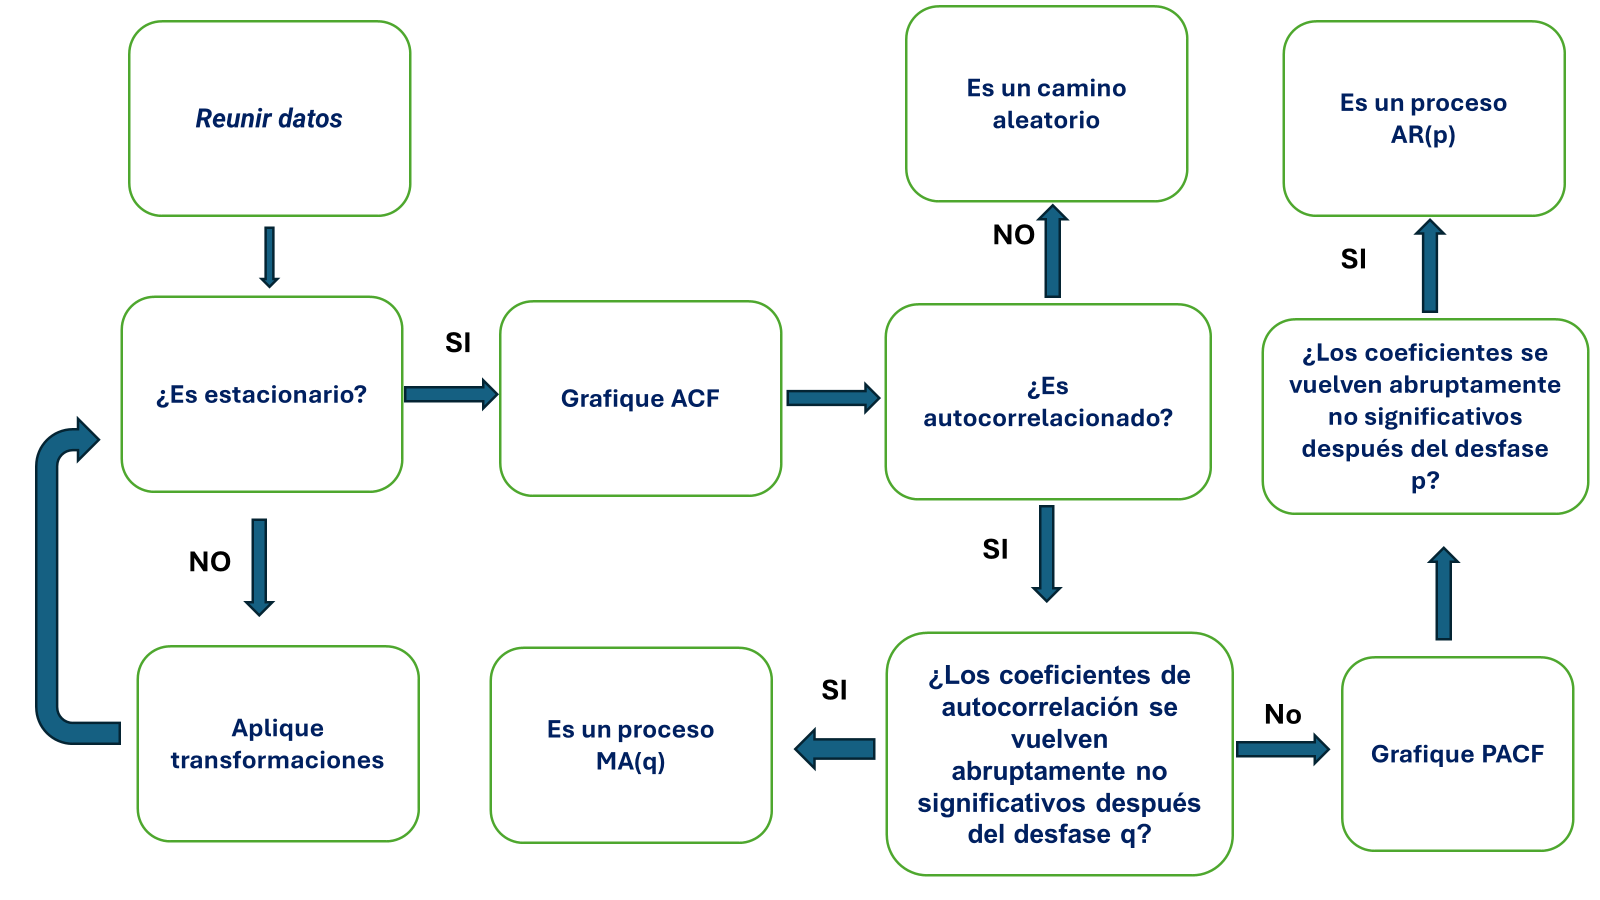

## **Ejemplo Ilustrativo Usando Python**
+ El primer paso natural es recopilar los datos. Aquí trabajaremos con el conjunto de datos de tráfico peatonal promedio semanal que presentamos al comienzo del capítulo.
+ Leeremos los datos usando pandas y los almacenaremos como un archivo DataFrame.
### **NOTA**
+ Vemos que nuestros datos contienen una sola columna foot_traffic , en la que se registra el tráfico peatonal semanal promedio en la tienda minorista.

## **Paso 1. Importando los datos y librerias**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.metrics

import statsmodels.tsa.stattools as sts # adf test
import statsmodels.graphics.tsaplots as sgt # plot acf
import statsmodels.tsa.statespace.sarimax as sarimax

In [ ]:
## **Paso 1. Importando los datos**
import pandas as pd

df = pd.read_csv('/content/foot_traffic.csv')

df.head() # Muestra las primeras cinco filas de datos.

,foot_traffic
0,500.496714
1,500.522366
2,501.426876
3,503.295990
4,504.132695


+ Verá que nuestros datos contienen una sola columna foot_traffic en la que se registra el tráfico peatonal semanal promedio en la tienda minorista.
+ Como siempre, representaremos gráficamente nuestros datos para ver si hay patrones observables, como una tendencia o estacionalidad.
+ A esta altura, ya debería sentirse cómodo con la representación gráfica de series temporales, por lo que no profundizaremos en el código que genera el gráfico.
+ **El resultado es el gráfico que se muestra en la figura 5.4.**

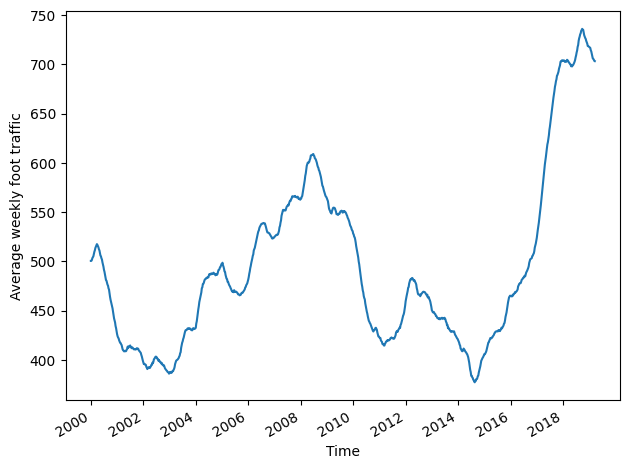

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(df['foot_traffic']) # Grafique el tráfico peatonal semanal promedio en una tienda minorista.
ax.set_xlabel('Time') # Etiqueta el eje x.
ax.set_ylabel('Average weekly foot traffic') # Etiqueta el eje y.

plt.xticks(np.arange(0, 1000, 104), np.arange(2000, 2020, 2)) # Etiqueta las marcas en el eje x.

fig.autofmt_xdate() # Incline las etiquetas en las marcas del eje x para que se muestren correctamente.
plt.tight_layout() #Elimine los espacios en blanco adicionales alrededor de la figura.

+ **Figura 5.4 Tráfico peatonal promedio semanal en una tienda minorista. El conjunto de datos contiene 1000 puntos de datos, comenzando en la primera semana de 2000.**
+ Si observamos la figura 5.4, veremos que no hay un patrón cíclico, por lo que podemos descartar la presencia de estacionalidad.
+ En cuanto a la tendencia, a veces es positiva y a veces negativa a lo largo de los años, siendo la tendencia más reciente positiva, desde 2016.

## **Paso 2. Comprobar la estacionariedad - usando la prueba ADF.**
+ Como se mencionó anteriormente, la presencia de una tendencia significa que nuestra serie no es estacionaria.
+ **Verifiquemos eso usando la prueba ADF**.
+ Nuevamente, debería sentirse cómodo ejecutando sin una explicación detallada del código.


In [ ]:
## **Paso 2. Comprobar la estacionariedad - usando la prueba ADF.**
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(df['foot_traffic'])

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -1.1758885999240747
p-value: 0.683880891789619


## **Coclusión de la prueba ADF**
+ El valor obtenido ADF de -1,18 junto con un valor p de 0,68.
+ **Dado que el estadístico ADF no es un número negativo grande y con un valor p mayor que 0,05, no podemos rechazar la hipótesis nula y, por lo tanto, nuestra serie no es estacionaria.**

## **Paso 2. Apique transformaciones para la serie original y volverla estacionaria**


In [ ]:
## **Paso 2. Apique transformaciones para la serie original y volverla estacionaria**
import numpy as np
foot_traffic_diff = np.diff(df['foot_traffic'], n=1) # Aplique una diferenciación de primer orden en los datos

+ Opcionalmente, podemos trazar nuestra serie diferenciada foot_traffic_diffpara ver si eliminamos con éxito el efecto de la tendencia.
+ La serie diferenciada se muestra en la figura 5.5. Podemos ver que efectivamente eliminamos la tendencia a largo plazo, ya que la serie comienza y termina aproximadamente con el mismo valor.

### **Graficando la serie diferenciada**

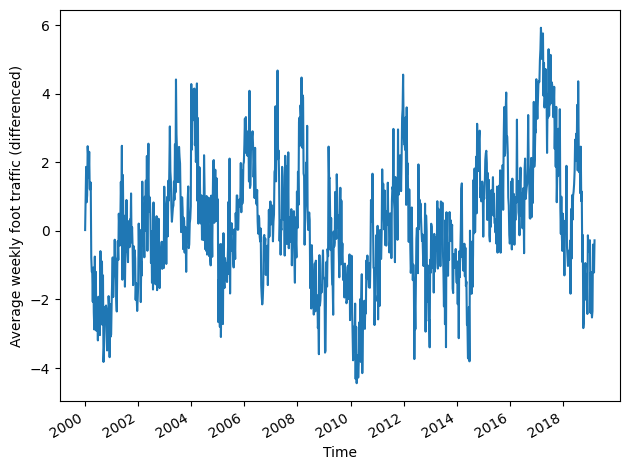

In [ ]:
## **Graficando la serie diferenciada**
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(foot_traffic_diff) # Grafique el tráfico peatonal semanal promedio en una tienda minorista.
ax.set_xlabel('Time') # Etiqueta el eje x.
ax.set_ylabel('Average weekly foot traffic (differenced)') # Etiqueta el eje y.

plt.xticks(np.arange(0, 1000, 104), np.arange(2000, 2020, 2)) # Etiqueta las marcas en el eje x.

fig.autofmt_xdate() # Incline las etiquetas en las marcas del eje x para que se muestren correctamente.
plt.tight_layout()

+ **Figura 5.5 Tráfico peatonal semanal promedio diferenciado en una tienda minorista. Observe que se ha eliminado el efecto de tendencia, ya que la serie comienza y termina aproximadamente en el mismo valor.**

## **Paso 4. Comprobar la estacionariedad - usando la prueba ADF para la serie diferenciada.**

In [ ]:
ADF_result = adfuller(foot_traffic_diff)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -5.268231347422044
p-value: 6.369317654781239e-06


## **Coclusión de la prueba ADF para la serie diferenciada**
+ Esto imprime una estadística ADF de -5,27 y un valor p de 6,36x10 -6.
+ **Con un valor p menor que 0,05, podemos rechazar la hipótesis nula, lo que significa que ahora tenemos una serie estacionaria.**

# **Paso 5. Grafica de la función de autocorrelación ACF para la serie diferenciada**

+ El siguiente paso es representar gráficamente la ACF y ver si existe autocorrelación y si los coeficientes dejan de ser significativos de forma abrupta después de un cierto intervalo.
+ Como hicimos en los dos capítulos anteriores, utilizaremos la función plot_acf de statsmodels. El resultado se muestra en la figura 5.6.
+ **Figura 5.6 Gráfico ACF del tráfico peatonal semanal promedio diferenciado en una tienda minorista. Observe cómo la trama va decayendo lentamente. Este es un comportamiento que no hemos observado antes y es indicativo de un proceso autorregresivo.**

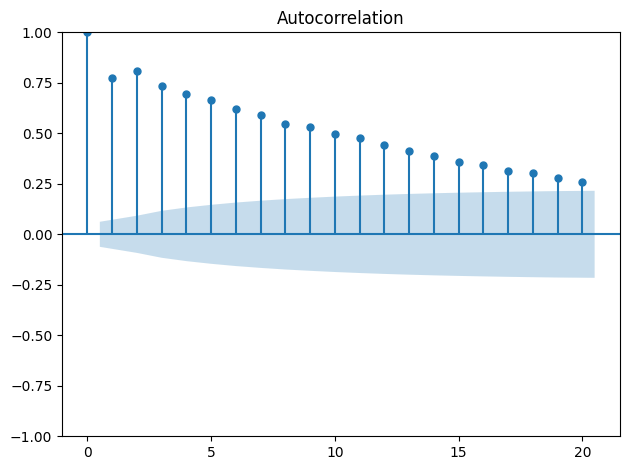

In [ ]:
# **Paso 5. Grafica de la función de autocorrelación ACF**
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(foot_traffic_diff, lags=20);

plt.tight_layout()

## **Acerca del gráfico de autocorrelación**
+ Si observamos la figura 5.6, notaremos que tenemos coeficientes de autocorrelación significativos más allá del retardo 0.
+ Por lo tanto, sabemos que nuestro proceso no es un paseo aleatorio.
+ Además, notaremos que los coeficientes decaen exponencialmente a medida que aumenta el retardo.
+ Por lo tanto, no hay un retardo en el que los coeficientes se vuelvan abruptamente no significativos.
+ **Esto significa que no tenemos un proceso de promedio móvil y que probablemente estemos estudiando un proceso autorregresivo.**
+ Cuando el gráfico de la ACF de un proceso estacionario muestra un patrón de decaimiento exponencial, probablemente tengamos un proceso autorregresivo en juego y debemos encontrar otra forma de identificar el orden $p$ del proceso $AR(p)$.
+ Específicamente, debemos centrar nuestra atención en el gráfico de la **función de autocorrelación parcial (PACF)**.

# **5.3.1. La función de autocorrelación parcial (PACF)**
+ En un intento de identificar el orden de un proceso autorregresivo estacionario, utilizamos el gráfico ACF tal como lo hicimos para un proceso de media móvil.
+ Desafortunadamente, el gráfico ACF no puede brindarnos esta información y por lo tanto debemos recurrir a la función de autocorrelación parcial o PACF.


### **Una situación particular**
+ Para comprender la función de autocorrelación parcial, o PACF, consideremos el siguiente escenario.
+ Supongamos que tenemos el siguiente proceso $AR(2)$:

+ **Ecuación 5.4**
$$y_t =0.33*y_{t –1} +0.50 *y_{t –2} $$

+ Ahora queremos medir cómo se relaciona $y_t$ con $y_{t-2}$ o, en otras palabras, queremos medir su correlación.
+ Esto se hace mediante la función de autocorrelación (ACF).
+ Sin embargo, a partir de la ecuación, podemos ver que $y_{t-1}$ también influye en $y_t$.
+ Aún más importante, también tiene un impacto en el valor de $y_{t-2}$ , ya que por la naturaleza de un proceso AR(2), cada valor depende de los dos valores anteriores.
+ Por lo tanto, cuando medimos la autocorrelación entre $y_t$ e $y_{t-2}$ usando el ACF, no estamos tomando en cuenta el hecho de que $y_{t-1}$ también influye tanto en $y_t$ como en $y_{t-2}$.
+ Esto significa que no estamos midiendo el verdadero impacto de $y_{t-2}$ en $y_t$.
+ Para hacerlo, debemos eliminar el efecto de $y_{t-1}$.
+ De esa manera, estamos midiendo efectivamente la asociación real entre $y_t$ e $y_{t-2}$.
+ Por lo tanto, estamos midiendo la autocorrelación parcial entre $y_t$ e $y_{t-2}$.
+ En términos más formales, *la autocorrelación parcial* mide la **correlación entre valores rezagados en una serie temporal cuando eliminamos la influencia de los valores rezagados correlacionados entre ellos.**
+ Estas se conocen como variables de confusión.
+ La función de autocorrelación parcial revelará cómo varía la autocorrelación parcial cuando aumenta el rezago.

### **Definición de Autocorrelación parcial**
+ La autocorrelación parcial mide la correlación entre valores rezagados en una serie de tiempo cuando eliminamos la influencia de otros valores rezagados correlacionados.
+ Podemos trazar la función de autocorrelación parcial para determinar el orden de un *proceso AR(p) estacionario*.
+ Los coeficientes no serán significativos después del rezago $p$.

## **Continuando con nuestra simulación - Autocorrelación parcial**
+ Una vez definidas las matrices de coeficientes, podemos alimentarlas a la `ArmaProcess función` y generaremos 1000 muestras.
+ Asegúrese de establecer la semilla aleatoria en 42 para poder reproducir los resultados que se muestran aquí.

+ Ahora que tenemos un proceso $AR(2)$ simulado, grafiquemos el PACF y veamos si los coeficientes se vuelven abruptamente no significativos después del retraso 2.
+ Si ese es el caso, entonces sabemos que podemos usar el gráfico PACF para determinar el orden de un proceso autorregresivo estacionario, al igual que podemos usar el gráfico ACF para determinar el orden de un proceso de media móvil estacionaria.

## **Codificando Nuestro ejemplo simulado**

In [ ]:
## **Nuestro ejemplo simulado**
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np

np.random.seed(42)
#Establezca los coeficientes del proceso MA(q) en 0, ya que solo nos interesa simular un proceso AR(2).
#Tenga en cuenta que el primer coeficiente es 1 para el retardo 0
#y debe proporcionarse como se especifica en la documentación.
ma2 = np.array([1, 0, 0])
ar2 = np.array([1, -0.33, -0.50])
#Establezca los coeficientes para el proceso AR(2).
# Nuevamente, el coeficiente en el retardo 0 es 1.
# Luego, escriba los coeficientes con signos opuestos a lo que se definió en la ecuación 5.4,
# como se especifica en la documentación.
AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

## **Graficamos la función de autocorrelación parcial**

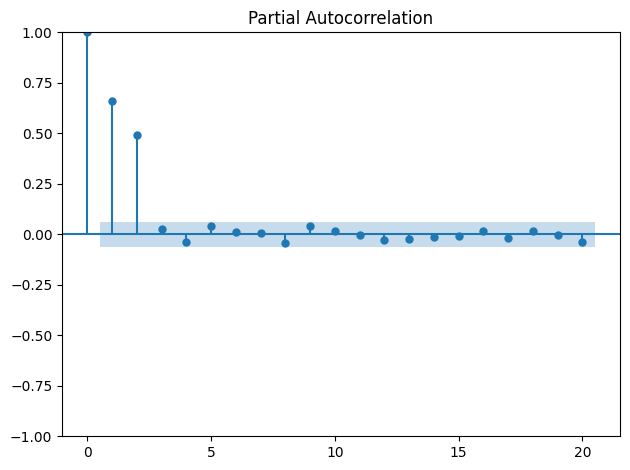

In [ ]:
## **Graficamos la función de autocorrelación parcial**
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(AR2_process, lags=20);

plt.tight_layout()

## **Conclusiones acerca del PACF**
+ Figura 5.7 Gráfico del PACF para nuestro proceso $AR(2)$ simulado.
+ Podemos ver claramente aquí que después del retraso 2, los coeficientes de autocorrelación parcial no son significativamente diferentes de 0.
+ Por lo tanto, podemos identificar el orden de un modelo $AR(p)$ estacionario utilizando el gráfico $PACF$.

## **Paso 6. Continuacion del ejemplo ilustrativo - Grafico $PACF$ para la serie diferenciada**

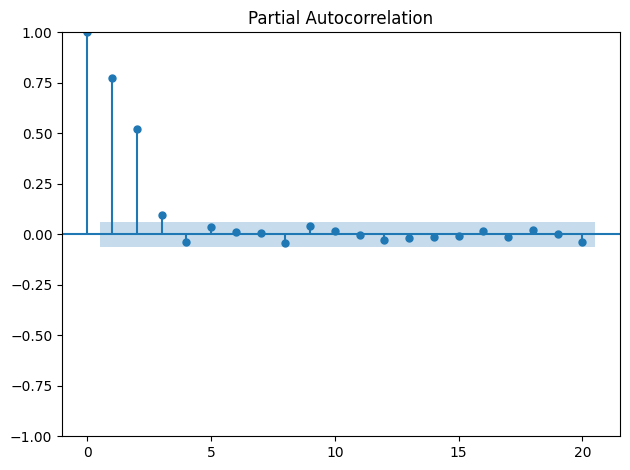

In [ ]:
## **Graficamos la función de autocorrelación parcial**
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(foot_traffic_diff, lags=20);

plt.tight_layout()

## **Conclusiones del gráfico de función de autocorrelación parcial de la seri diferenciada**
+ Figura 5.8 El PACF de nuestro tráfico peatonal semanal promedio diferenciado en una tienda minorista.
+ Puede ver que los coeficientes no son significativos después del retardo 3.
+ Por lo tanto, podemos decir que **nuestro proceso estacionario es un proceso autorregresivo de tercer orden, o un proceso AR(3)**.

# **5.4. Pronósticos de un proceso autorregresivo**
+ Una vez que se determina el orden, podemos ajustar un modelo autorregresivo para pronosticar nuestra serie temporal.
+ En este caso, el modelo también se denomina $AR(p)$, donde $p$ sigue siendo el orden del proceso.
+ Pronosticaremos el tráfico peatonal promedio de la próxima semana en una tienda minorista utilizando el mismo conjunto de datos con el que hemos estado trabajando.
+ Para evaluar nuestros pronósticos, conservaremos las últimas 52 semanas de datos para nuestro conjunto de prueba, mientras que el resto se utilizará para el entrenamiento.
+ De esa manera, podemos evaluar el rendimiento de nuestro pronóstico durante un período de 1 año.

+ Vemos que nuestro conjunto de entrenamiento contiene 947 puntos de datos, mientras que el conjunto de prueba contiene 52 puntos de datos como se esperaba.
+ Tenga en cuenta que la suma de ambos conjuntos da 999, que es un punto de datos menos de nuestra serie original.
+ Esto es normal, ya que al aplicar la diferenciación para hacer la serie estacionaria, sabemos que la diferenciación elimina el primer punto de datos de la serie.

## **Paso 7. Pronosticos con el modelo AR(3) de nuestra serie diferenciada**

### **a. Cree un DataFrame a partir de los datos de tráfico peatonal diferenciados.**

In [ ]:
### **a. Cree un DataFrame a partir de los datos de tráfico peatonal diferenciados.**
df_diff = pd.DataFrame({'foot_traffic_diff': foot_traffic_diff})

train = df_diff[:-52]
test = df_diff[-52:]

print(f'El conjunto de entrenaiento tiene {len(train)} datos')
print(f'El conjunto de prueba tiene {len(test)} datos')


El conjunto de entrenaiento tiene 947 datos
El conjunto de prueba tiene 52 datos


## **b. Visualizando la región de pronostico para las dos series: original y diferenciada**
+ **Figura 5.9 Período de prueba de nuestros pronósticos sobre la serie original y de diferencias. Tenga en cuenta que nuestra serie diferenciada ha perdido su primer dato.**

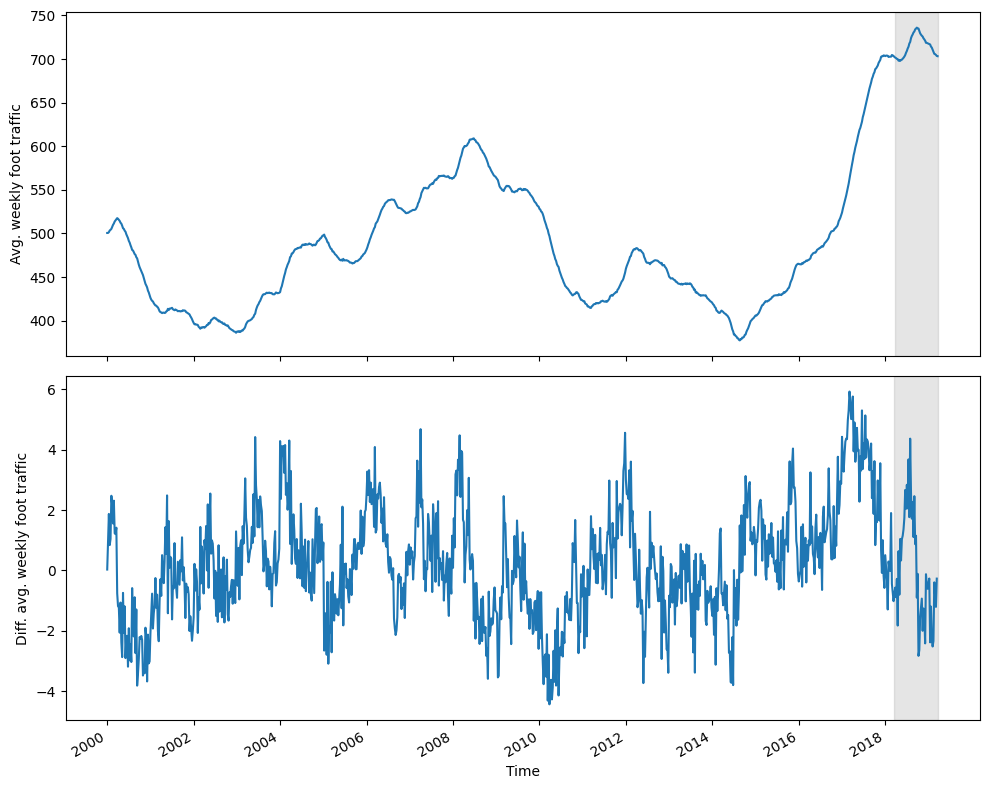

In [ ]:
## **b. Visualizando la región de pronostico para las dos series: original y diferenciada**
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True,
 figsize=(10, 8))

ax1.plot(df['foot_traffic'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Avg. weekly foot traffic')
ax1.axvspan(948, 1000, color='#808080', alpha=0.2)

ax2.plot(df_diff['foot_traffic_diff'])
ax2.set_xlabel('Time')
ax2.set_ylabel('Diff. avg. weekly foot traffic')
ax2.axvspan(947, 999, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 1000, 104), np.arange(2000, 2020, 2))

fig.autofmt_xdate()
plt.tight_layout()

### **Acerca de los pronósticos**
+ Dado que nuestro objetivo es pronosticar el tráfico peatonal promedio de la próxima semana en la tienda minorista, realizaremos pronósticos continuos sobre nuestro conjunto de prueba.
+ Recuerde que nuestros datos se registraron durante un período semanal, por lo que predecir el siguiente paso de tiempo significa que estamos pronosticando
el tráfico peatonal promedio de la próxima semana.
+ **Realizaremos pronósticos utilizando tres métodos diferentes.**
+  El método de la media histórica y el método del último valor conocido actuarán como líneas de base, y utilizaremos un modelo AR(3), ya que establecimos previamente que tenemos un proceso autorregresivo estacionario de tercer orden.
+ Como hicimos en el capítulo anterior, utilizaremos el error cuadrático medio (MSE) para evaluar el rendimiento de cada método de pronóstico.
+ Además, reutilizaremos la función que definimos en el capítulo anterior para pronosticar de forma recursiva durante el período de prueba.
+ Sin embargo, esta vez debemos incluir un método para utilizar un modelo autorregresivo.
+ Usaremos nuevamente la función **SARIMAX** de statsmodels, ya que engloba un modelo AR.
+ Como se mencionó, SARIMAX es un modelo complejo que **nos permite considerar efectos estacionales, procesos autorregresivos, series de tiempo no estacionarias, procesos de promedio móvil y variables exógenas, todo en un solo modelo**.
+ Por ahora, ignoraremos todos los factores excepto la parte autorregresiva móvil.



## **c. Una función para pronosticar recursivamente en un horizonte**

In [ ]:
!pip install statsmodels
import statsmodels.api as sm # Import the statsmodels module

def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int,
                     window: int, method: str) -> list:
    '''
    given a dataset, forecast using one of three methods:

        1. historical mean (mean)
        2. last value  (last)
        3. autoregressive (ar)

    the training length will be updated with each iteration as if we were
    seeing new observations

    :param pd.DataFrame df: data frame with two columns
    :param int train_len: number of data point that can be used to fit the
                          model
    :param int horizon: length of the test set, how many values we want to
                        predict
    :param int window: how many timesteps are predicted at a time
    :param int method: mean | last | AR, method used to do the forecast

    :return:
    :rtype: list
    '''

    # train length + the horizon make the total length of the dataset
    # meaning it includes the prediction as well
    total_len = train_len + horizon

    if method.lower() == 'mean':
        pred_mean = []

        # go from last train value to total length, step by step
        for i in range(train_len, total_len, window):
            # this means calculating the mean thru each timestep
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range (window))

        return pred_mean

    if method.lower() == 'last':
        pred_last_value = []

        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))

        return pred_last_value

    if method.lower() == 'ar':
        pred_ma = []

        for i in range (train_len, total_len, window):
            # the order specifies an AR(3) model.
            model = sm.tsa.statespace.SARIMAX(df[:i], order = (3, 0, 0)) # Use sm to reference the statsmodels module
            r = model.fit(disp = False)
            predictions = r.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_ma.extend(oos_pred)

        return pred_ma

    return []

## **d. Generar las predicciones**
+ Una vez definida nuestra función, podemos utilizarla para generar las predicciones según cada método. Las asignaremos a su propia columna en la prueba.**

In [ ]:
## **d. Generar las predicciones**
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 1

pred_mean = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_AR = rolling_forecast(df_diff, TRAIN_LEN, HORIZON, WINDOW, 'AR')

test['pred_mean'] = pred_mean
test['pred_last_value'] = pred_last_value
test['pred_AR'] = pred_AR
test.head()

<ipython-input-31-953a8d6218c2>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_mean'] = pred_mean
<ipython-input-31-953a8d6218c2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred_last_value'] = pred_last_value
<ipython-input-31-953a8d6218c2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

,foot_traffic_diff,pred_mean,pred_last_value,pred_AR
947,-0.776601,0.213270,-1.021893,-0.719714
948,-0.574631,0.212226,-0.776601,-0.814547
949,-0.890697,0.211397,-0.574631,-0.664738
950,-0.283552,0.210237,-0.890697,-0.641469
951,-1.830685,0.209717,-0.283552,-0.579279


## **e. Visualizar las predicciones**
+ Ahora podemos visualizar nuestras predicciones frente a los valores observados en el conjunto de prueba.
+ Tenga en cuenta que estamos trabajando con series diferenciadas, por lo que nuestras predicciones también son valores diferenciados.
+ El resultado se muestra en la figura 5.10.

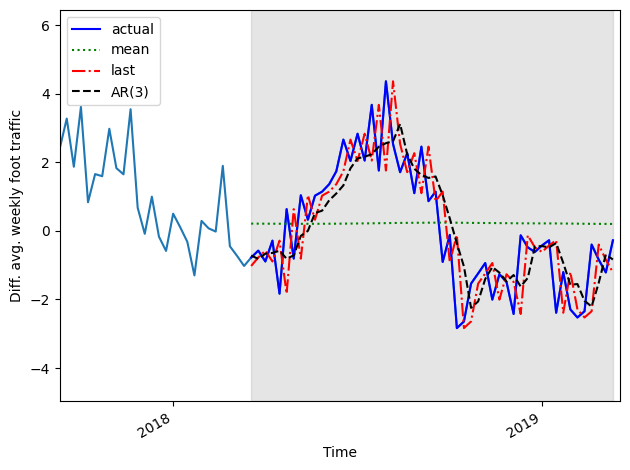

In [ ]:
## **e. Visualizar las predicciones**
fig, ax = plt.subplots()

ax.plot(df_diff['foot_traffic_diff'])
# Grafique parte del conjunto de entrenamiento para que podamos
# ver la transición del conjunto de entrenamiento al conjunto de prueba.
ax.plot(test['foot_traffic_diff'], 'b-', label='actual')
# Grafique los valores del conjunto de prueba.
ax.plot(test['pred_mean'], 'g:', label='mean')
# Grafique las predicciones a partir del método de la media histórica.
ax.plot(test['pred_last_value'], 'r-.', label='last')
# Grafique las predicciones a partir del método del último valor conocido.
ax.plot(test['pred_AR'], 'k--', label='AR(3)')
 # Grafique las predicciones del modelo AR(3)
ax.legend(loc=2)

ax.set_xlabel('Time')
ax.set_ylabel('Diff. avg. weekly foot traffic')

ax.axvspan(947, 998, color='#808080', alpha=0.2)

ax.set_xlim(920, 999)

plt.xticks([936, 988],[2018, 2019])

fig.autofmt_xdate()
plt.tight_layout()

+ **Figura 5.10 Pronósticos del tráfico peatonal promedio semanal diferenciado en una tienda minorista.**

### ***Acerca del grafico de predicciones***
+ Si observamos la figura 5.10, veremos que, una vez más, el uso de la media histórica produce una línea recta, que se muestra en el gráfico como una línea de puntos.
+ En cuanto a las predicciones del modelo AR(3) y el método del último valor conocido, las curvas son casi confusas con las del conjunto de prueba, por lo que tendremos que medir el error cuadrático medio para evaluar qué método es el más eficaz.
+ Nuevamente, utilizaremos la función `mean_squared_error` de la biblioteca `sklearn`.

## **f. Error cuadratico medio - MSE**

In [ ]:
## **f. Error cuadratico medio - MSE**
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test['foot_traffic_diff'], test['pred_mean'])
mse_last = mean_squared_error(test['foot_traffic_diff'],
 test['pred_last_value'])
mse_AR = mean_squared_error(test['foot_traffic_diff'], test['pred_AR'])

print('El MSE  con los diferentes metodos ingenuos y AR(3)')
print(f'El Error MSE con la media historica es {mse_mean}')
print(f'El Error MSE la última observación es {mse_last}')
print(f'El Error MSE con la AR(3) es {mse_AR}')

El MSE  con los diferentes metodos ingenuos y AR(3)
El Error MSE con la media historica es 3.1079979374701447
El Error MSE la última observación es 1.448730118495964
El Error MSE con la AR(3) es 0.9242479164116852


## **g. Dibujando el Error cuadratico medio - MSE**

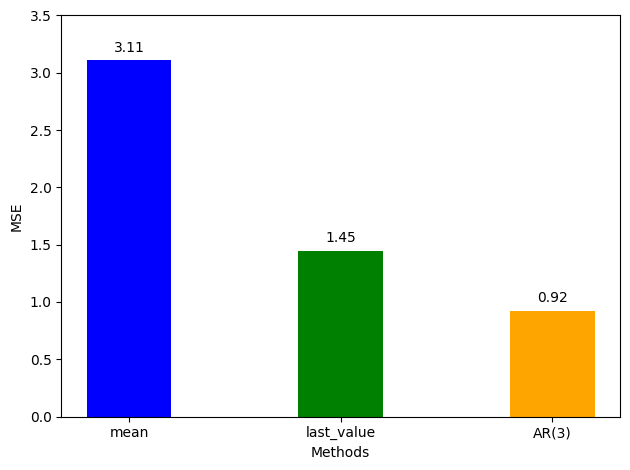

In [ ]:
## **g. Dibujando el Error cuadratico medio - MSE**
import matplotlib.pyplot as plt

# Datos
x = ['mean', 'last_value', 'AR(3)']
y = [mse_mean, mse_last, mse_AR]

# Colores para las barras (puedes modificar esta lista según tus preferencias)
colors = ['blue', 'green', 'orange']

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar las barras con colores específicos
bars = ax.bar(x, y, width=0.4, color=colors)

# Etiquetas y límites del eje y
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 3.5)

# Añadir texto con los valores encima de cada barra
for bar, value in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.05,
             round(value, 2),
             ha='center', va='bottom')

# Ajustar el diseño y guardar la figura
plt.tight_layout()
plt.savefig('figures.png', dpi=300)
plt.show()


## **Acerca del MSE**
+ Dado que el MSE para el modelo AR(3) es el más bajo de todos, concluimos que el modelo AR(3) es el método de mejor rendimiento para pronosticar el tráfico peatonal promedio de la próxima semana.
+ Esto era de esperar, ya que establecimos que nuestro proceso estacionario era un proceso autorregresivo de tercer orden.
+ Por lo tanto, tiene sentido que el modelado utilizando un modelo AR(3) produzca las mejores predicciones que los métodos de pronóstico ingenuos.



## **h. Revirtiendo la transformación**
+ Dado que nuestros pronosticos son valores diferenciados, necesitamos revertir la transformación para que nuestras previsiones vuelvan a la escala original de los datos; de lo contrario, nuestras predicciones no tendrán sentido en un contexto empresarial.
+ Para ello, podemos tomar la suma acumulada de nuestras predicciones y añadirla al último valor de nuestro conjunto de entrenamiento en la serie original.
+ Este punto se encuentra en el índice 948, ya que estamos pronosticando las últimas 52 semanas en un conjunto de datos que contiene 1000 puntos.

In [ ]:
## **h. Revirtiendo la transformación**
df['pred_foot_traffic'] = pd.Series()
df['pred_foot_traffic'][948:] = df['foot_traffic'].iloc[948] + test.pred_AR.cumsum()
# Asigna las predicciones no diferenciadas a la columna pred_foot_traffic en df.

<ipython-input-39-6faae32fd3d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred_foot_traffic'][948:] = df['foot_traffic'].iloc[948] + test.pred_AR.cumsum()


In [ ]:
df.head()

,foot_traffic,pred_foot_traffic
0,500.496714,NaN
1,500.522366,NaN
2,501.426876,NaN
3,503.295990,NaN
4,504.132695,NaN


In [ ]:
df.tail()

,foot_traffic,pred_foot_traffic
995,706.009031,707.386725
996,705.610549,705.182354
997,704.771335,703.667661
998,703.559920,702.977531
999,703.285236,702.143383


## **i. Graficamos nuestras prediciiones indiferenciadas**
+ Ahora podemos graficar nuestras predicciones indiferenciadas contra los valores observados en el conjunto de prueba de la serie original en su escala original.

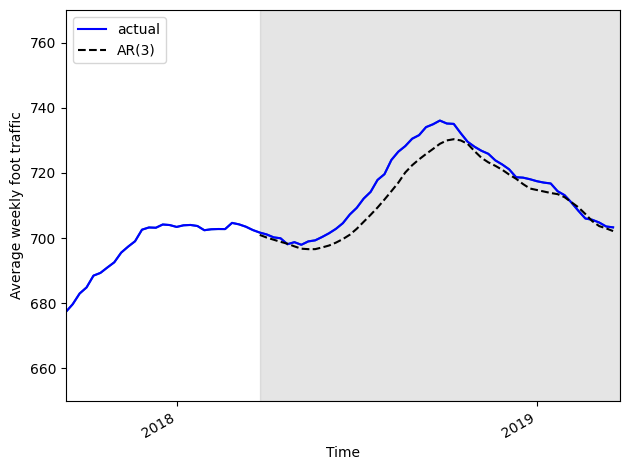

In [ ]:
## **i. Graficamos nuestras prediciiones indiferenciadas**
fig, ax = plt.subplots()

ax.plot(df['foot_traffic'])
ax.plot(df['foot_traffic'], 'b-', label='actual')
ax.plot(df['pred_foot_traffic'], 'k--', label='AR(3)')

ax.legend(loc=2)

ax.set_xlabel('Time')
ax.set_ylabel('Average weekly foot traffic')

ax.axvspan(948, 1000, color='#808080', alpha=0.2)

ax.set_xlim(920, 1000)
ax.set_ylim(650, 770)

plt.xticks([936, 988],[2018, 2019])

fig.autofmt_xdate()
plt.tight_layout()

+ **Figura 5.11 Pronósticos indiferenciados del modelo AR(3)**

+ Si observamos la figura 5.11, podemos ver que nuestro modelo (que se muestra como una línea discontinua) sigue la tendencia general de los valores observados en el conjunto de prueba.


## **j. Error absoluto medio (MAE)**
+ Ahora podemos medir el error absoluto medio (MAE) en el conjunto de datos original para obtener su significado en un contexto empresarial.
+ Simplemente mediremos el MAE utilizando las predicciones no diferenciadas.

In [ ]:
## **j. Error absoluto medio (MAE)**
from sklearn.metrics import mean_absolute_error

mae_AR_undiff = mean_absolute_error(df['foot_traffic'][948:],
 df['pred_foot_traffic'][948:])

print(f'Error absoluto medio MAE ={mae_AR_undiff}')

Error absoluto medio MAE =3.478033559658852


## **Acerca del error absoluto MAE**
+ Esto arroja un error absoluto medio de 3,45.
+ Esto significa que nuestras predicciones están equivocadas en 3.45 personas en promedio, ya sea por encima o por debajo del valor real del tráfico peatonal de la semana.
+ Tenga en cuenta que informamos el MAE porque tiene un significado comercial simple que es fácil de entender e interpretar.

# **5.5. Coclusiones de Capitulo 5**
+ En este capítulo, analizamos el proceso autorregresivo y cómo se puede modelar mediante un modelo $AR(p)$, donde $p$ es el orden y determina cuántos valores rezagados se incluyen en el modelo.
+ También vimos que trazar la $ACF$ no nos ayuda a determinar el orden de un proceso $AR(p)$ estacionario.
+ En cambio, debemos trazar la $PACF$, en la que los coeficientes de autocorrelación parcial serán significativos solo hasta el rezago $p$.
+ Sin embargo, puede haber una situación en la que ni la $ACF$ ni la $PACF$ nos brinden información.
+ *¿Qué pasa si tanto el gráfico ACF como el PACF presentan un decaimiento lento o un patrón sinusoidal?*
+ En ese caso, no se puede inferir ningún orden para el proceso *MA(q)* o *AR(p)*.
+ Esto significa que nos enfrentamos a un proceso más complejo que probablemente sea una combinación de un proceso *AR(p)* y un proceso *MA(q)*.
+ Esto se denomina proceso de media móvil autorregresiva , o *ARMA(p,q)* , y será el tema del próximo capítulo.


## **5.6. Ejercicios**
+ Pon a prueba tus conocimientos y dominio del modelo AR(p) con estos ejercicios.

### **5.6.1. Simular un proceso AR(2) y realizar pronósticos**
+ Simule un proceso $AR(2)$ estacionario. Utilice la `ArmaProcess`función de la `statsmodels`biblioteca y simule el siguiente proceso:

$$y_t = 0,33*y_{t –1} + 0,50*y_{t –2}$$

+ **1. Para este ejercicio, genere 1000 muestras.**
+ **2. Dibuje el proceso autorregresivo simulado.**
+ **3. Ejecute la prueba ADF y verifique si el proceso es estacionario. Si no lo es, aplique la diferenciación.**
+ **4. Dibuje el ACF. ¿Está decayendo lentamente?**
+ **5. Dibuje el PACF. ¿Hay coeficientes significativos después del desfase 2?**
+ **6. Separe la serie simulada en conjuntos de prueba y de entrenamiento. Tome los primeros 800 pasos de tiempo para el conjunto de entrenamiento y asigne el resto al conjunto de prueba.**
+ **7. Haga pronósticos sobre el conjunto de prueba. Utilice el método de la media histórica, el método del último valor conocido y un modelo AR(2). Utilice la función rolling_forecast y utilice una longitud de ventana de 2.**
+ **8. Dibuje sus pronósticos.**
+ **9. Mida el MSE e identifique su modelo campeón.**
+ **10. Dibuje sus MSE en un gráfico de barras.**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


+ **1. Para este ejercicio, genere 1000 muestras.**

In [ ]:
np.random.seed(42)

ma2 = np.array([1, 0, 0])
ar2 = np.array([1, -0.33, -0.50])

AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

+ **2. Dibuje el proceso autorregresivo simulado.**

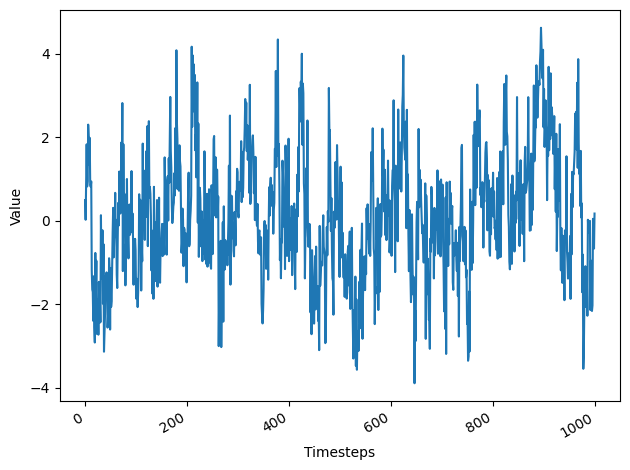

In [ ]:
fig, ax = plt.subplots()

ax.plot(AR2_process)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

fig.autofmt_xdate()
plt.tight_layout()

+ **3. Ejecute la prueba ADF y verifique si el proceso es estacionario. Si no lo es, aplique la diferenciación.**

In [ ]:
ADF_result = adfuller(AR2_process)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -7.566606021416906
p-value: 2.9145161293762553e-11


+ **4. Dibuje el ACF. ¿Está decayendo lentamente?**

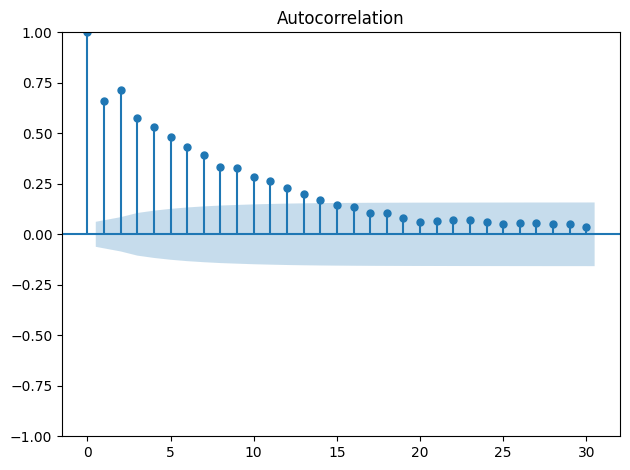

In [ ]:
plot_acf(AR2_process, lags=30);

plt.tight_layout()

+ **5. Dibuje el PACF. ¿Hay coeficientes significativos después del desfase 2?**

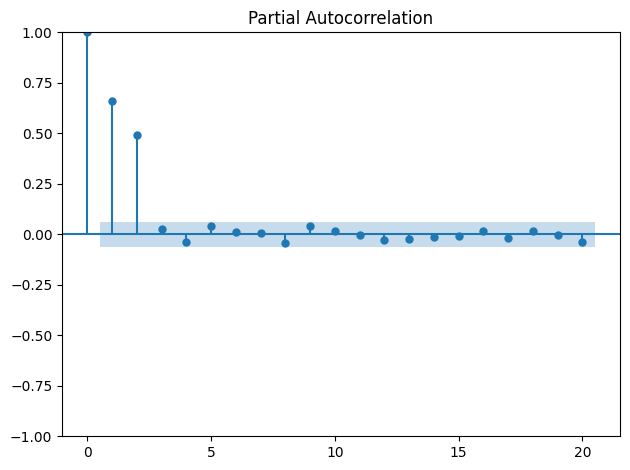

In [ ]:
plot_pacf(AR2_process, lags=20);

plt.tight_layout()

+ **6. Separe la serie simulada en conjuntos de prueba y de entrenamiento. Tome los primeros 800 pasos de tiempo para el conjunto de entrenamiento y asigne el resto al conjunto de prueba.**

In [ ]:
df = pd.DataFrame({'value': AR2_process})

train = df[:800]
test = df[800:]

+ **7. Haga pronósticos sobre el conjunto de prueba. Utilice el método de la media histórica, el método del último valor conocido y un modelo AR(2). Utilice la función rolling_forecast y utilice una longitud de ventana de 2.**

In [ ]:
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:

    total_len = train_len + horizon
    end_idx = train_len

    if method == 'mean':
        pred_mean = []

        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))

        return pred_mean

    elif method == 'last':
        pred_last_value = []

        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))

        return pred_last_value

    elif method == 'AR':
        pred_AR = []

        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(2,0,0))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_AR.extend(oos_pred)

        return pred_AR

+ **8. Dibuje sus pronósticos.**

In [ ]:
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 2

pred_mean = rolling_forecast(df, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_AR = rolling_forecast(df, TRAIN_LEN, HORIZON, WINDOW, 'AR')

test['pred_mean'] = pred_mean
test['pred_last_value'] = pred_last_value
test['pred_AR'] = pred_AR

test.head()

,value,pred_mean,pred_last_value,pred_AR
800,1.153388,-0.049737,0.461912,0.208203
801,0.095529,-0.049737,0.461912,0.289199
802,0.704340,-0.048056,0.095529,0.586307
803,-0.182079,-0.048056,0.095529,0.233598
804,-0.142412,-0.047287,-0.182079,0.281393


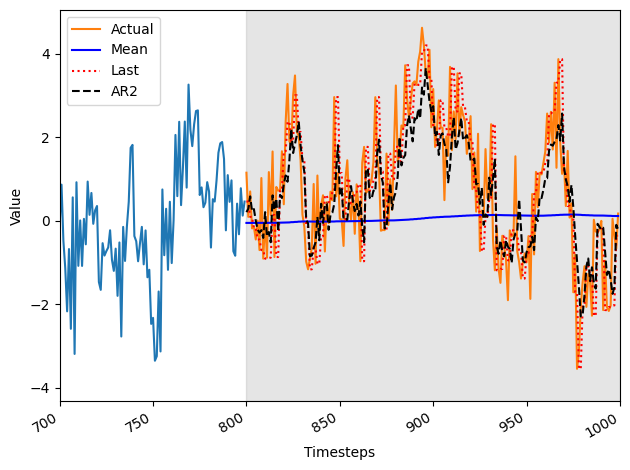

In [ ]:
fig, ax = plt.subplots()

ax.plot(train)
ax.plot(test['value'], label='Actual')
ax.plot(test['pred_mean'], 'b-', label='Mean')
ax.plot(test['pred_last_value'], 'r:', label='Last')
ax.plot(test['pred_AR'], 'k--', label='AR2')

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

ax.legend(loc='best')

ax.axvspan(800, 1000, color='#808080', alpha=0.2)

plt.xlim(700, 1000)
fig.autofmt_xdate()
plt.tight_layout()

+ **9. Mida el MSE e identifique su modelo campeón.**

In [ ]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_last = mean_squared_error(test['value'], test['pred_last_value'])
mse_AR = mean_squared_error(test['value'], test['pred_AR'])

print('El MSE  con los diferentes metodos ingenuos y AR(3)')
print(f'El Error MSE con la media historica es {mse_mean}')
print(f'El Error MSE la última observación es {mse_last}')
print(f'El Error MSE con la AR(3) es {mse_AR}')

El MSE  con los diferentes metodos ingenuos y AR(3)
El Error MSE con la media historica es 3.0882016808214443
El Error MSE la última observación es 1.2111519051869672
El Error MSE con la AR(3) es 0.9692635186184201


+ **10. Dibuje sus MSE en un gráfico de barras.**

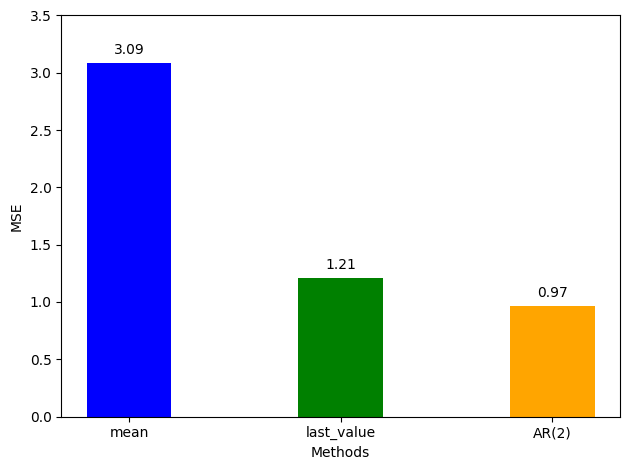

In [ ]:
## **g. Dibujando el Error cuadratico medio - MSE**
import matplotlib.pyplot as plt

# Datos
x = ['mean', 'last_value', 'AR(2)']
y = [mse_mean, mse_last, mse_AR]

# Colores para las barras (puedes modificar esta lista según tus preferencias)
colors = ['blue', 'green', 'orange']

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar las barras con colores específicos
bars = ax.bar(x, y, width=0.4, color=colors)

# Etiquetas y límites del eje y
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 3.5)

# Añadir texto con los valores encima de cada barra
for bar, value in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.05,
             round(value, 2),
             ha='center', va='bottom')

# Ajustar el diseño y guardar la figura
plt.tight_layout()
plt.savefig('figures.png', dpi=300)
plt.show()


# **5.6.2. Simular un proceso AR(p) y realizar pronósticos**
+ Recrear el ejercicio anterior pero simular un proceso AR(p) de su elección.
+ Experimente con un proceso autorregresivo de tercer o cuarto orden.
+ Recomendaría generar 10.000 muestras.
+ Al realizar pronósticos, experimente con diferentes valores para el parámetro de ventana de su función rolling_forecast.
+ ¿Cómo afecta el rendimiento del modelo?
+ ¿Existe un valor que minimice el MSE?

+ **1. Para este ejercicio, genere 1000 muestras.**

In [ ]:
np.random.seed(42)

ma3 = np.array([1, 0, 0, 0])
ar3 = np.array([1, -0.33, -0.50, -0.07])

AR3_process = ArmaProcess(ar3, ma3).generate_sample(nsample=10000)

+ **2. Dibuje el proceso autorregresivo simulado.**

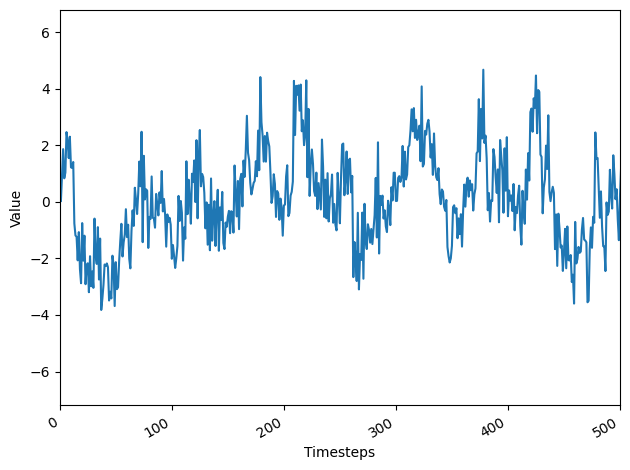

In [ ]:
fig, ax = plt.subplots()

ax.plot(AR3_process)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.xlim(0, 500)

fig.autofmt_xdate()
plt.tight_layout()

+ **3. Ejecute la prueba ADF y verifique si el proceso es estacionario. Si no lo es, aplique la diferenciación.**

In [ ]:
ADF_result = adfuller(AR3_process)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -17.432292735214446
p-value: 4.7596122215787705e-30


+ **4. Dibuje el ACF. ¿Está decayendo lentamente?**


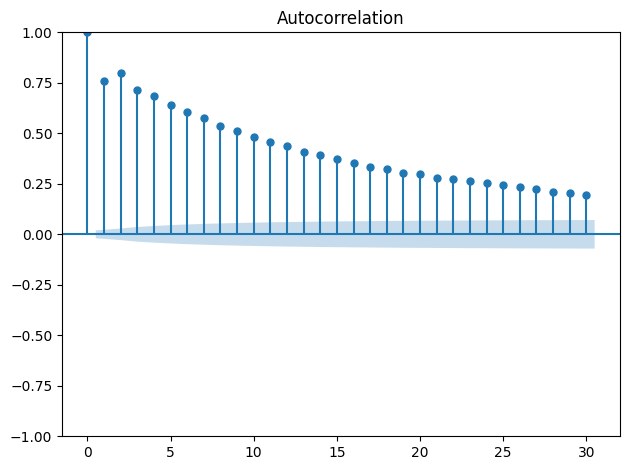

In [ ]:
plot_acf(AR3_process, lags=30);

plt.tight_layout()

+ **5. Dibuje el PACF. ¿Hay coeficientes significativos después del desfase 2?**

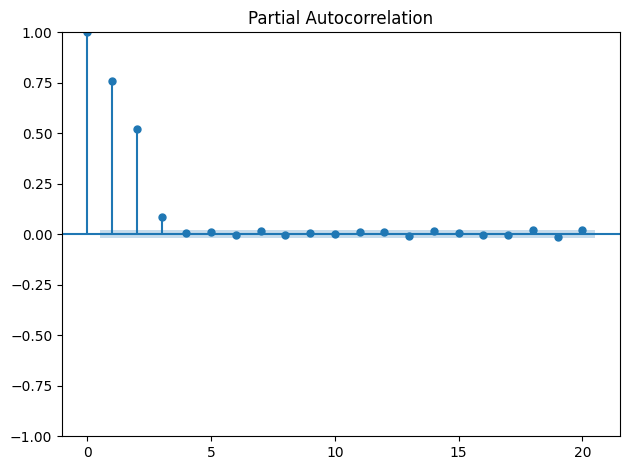

In [ ]:
plot_pacf(AR3_process, lags=20);

plt.tight_layout()

+ **6. Separe la serie simulada en conjuntos de prueba y de entrenamiento. Tome los primeros 800 pasos de tiempo para el conjunto de entrenamiento y asigne el resto al conjunto de prueba.**

In [ ]:
AR3_df = pd.DataFrame({'value': AR3_process})

AR3_train = AR3_df[:-200]
AR3_test = AR3_df[-200:]

print(len(AR3_train))

9800


+ **7. Haga pronósticos sobre el conjunto de prueba. Utilice el método de la media histórica, el método del último valor conocido y un modelo AR(2). Utilice la función rolling_forecast y utilice una longitud de ventana de 2.**

In [ ]:
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:

    total_len = train_len + horizon
    end_idx = train_len

    if method == 'mean':
        pred_mean = []

        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))

        return pred_mean

    elif method == 'last':
        pred_last_value = []

        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))

        return pred_last_value

    elif method == 'AR':
        pred_AR = []

        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(3,0,0))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_AR.extend(oos_pred)

        return pred_AR

+ **8. Dibuje sus pronósticos.**

In [ ]:
TRAIN_LEN = len(AR3_train)
HORIZON = len(AR3_test)
WINDOW = 2

pred_mean = rolling_forecast(AR3_df, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(AR3_df, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_AR = rolling_forecast(AR3_df, TRAIN_LEN, HORIZON, WINDOW, 'AR')

AR3_test['pred_mean'] = pred_mean
AR3_test['pred_last_value'] = pred_last_value
AR3_test['pred_AR'] = pred_AR

AR3_test.head()

,value,pred_mean,pred_last_value,pred_AR
9800,0.251942,-0.019215,-1.360546,-0.654957
9801,-0.127163,-0.019215,-1.360546,-0.918610
9802,2.294406,-0.019199,-0.127163,-0.037953
9803,-0.304373,-0.019199,-0.127163,-0.051933
9804,1.860432,-0.018992,-0.304373,1.024416


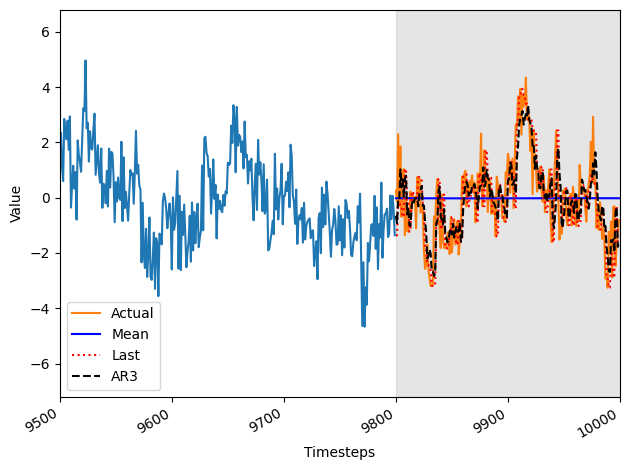

In [ ]:
fig, ax = plt.subplots()

ax.plot(AR3_train)
ax.plot(AR3_test['value'], label='Actual')
ax.plot(AR3_test['pred_mean'], 'b-', label='Mean')
ax.plot(AR3_test['pred_last_value'], 'r:', label='Last')
ax.plot(AR3_test['pred_AR'], 'k--', label='AR3')

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

ax.legend(loc='best')

ax.axvspan(9800, 10000, color='#808080', alpha=0.2)

plt.xlim(9500, 10000)
fig.autofmt_xdate()
plt.tight_layout()

+ **9. Mida el MSE e identifique su modelo campeón.**

In [ ]:
mse_mean = mean_squared_error(AR3_test['value'], AR3_test['pred_mean'])
mse_last = mean_squared_error(AR3_test['value'], AR3_test['pred_last_value'])
mse_AR = mean_squared_error(AR3_test['value'], AR3_test['pred_AR'])


print('El MSE  con los diferentes metodos ingenuos y AR(3)')
print(f'El Error MSE con la media historica es {mse_mean}')
print(f'El Error MSE la última observación es {mse_last}')
print(f'El Error MSE con la AR(3) es {mse_AR}')

El MSE  con los diferentes metodos ingenuos y AR(3)
El Error MSE con la media historica es 2.136445934005893
El Error MSE la última observación es 1.2881802521489663
El Error MSE con la AR(3) es 0.9969940312398288


+ **10. Dibuje sus MSE en un gráfico de barras.**

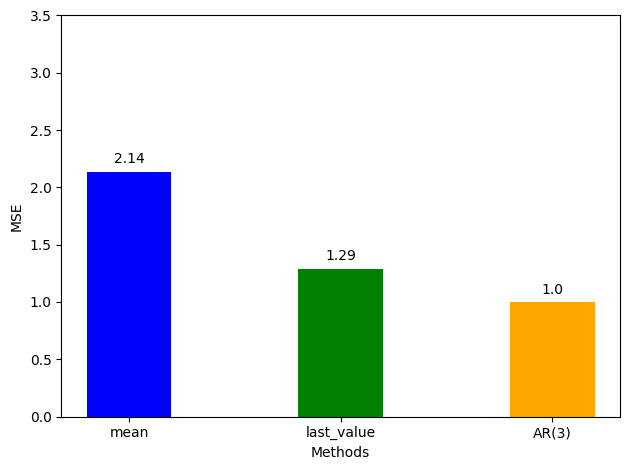

In [ ]:
## **g. Dibujando el Error cuadratico medio - MSE**
import matplotlib.pyplot as plt

# Datos
x = ['mean', 'last_value', 'AR(3)']
y = [mse_mean, mse_last, mse_AR]

# Colores para las barras (puedes modificar esta lista según tus preferencias)
colors = ['blue', 'green', 'orange']

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar las barras con colores específicos
bars = ax.bar(x, y, width=0.4, color=colors)

# Etiquetas y límites del eje y
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 3.5)

# Añadir texto con los valores encima de cada barra
for bar, value in zip(bars, y):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.05,
             round(value, 2),
             ha='center', va='bottom')

# Ajustar el diseño y guardar la figura
plt.tight_layout()
plt.savefig('figures.png', dpi=300)
plt.show()


# **Resumen Capítulo 5**
+ **1. Un proceso autorregresivo establece que el valor actual depende linealmente de sus valores pasados ​​y de un término de error.**
+ **2. Si el gráfico de la ACF de un proceso estacionario muestra una disminución lenta, entonces es probable que tenga un proceso autorregresivo.**
+ **3. La autocorrelación parcial mide la correlación entre dos valores rezagados de una serie temporal cuando se elimina el efecto de los otros valores rezagados autocorrelacionados.**
+ **4. Al trazar el gráfico de la PACF de un proceso autorregresivo estacionario se mostrará el orden p del proceso. Los coeficientes serán significativos solo hasta el rezago p.**